In [1]:
# Step 1: Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Upload Excel file

file_path = 'BrokerComparison1.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

In [3]:
# Step 3: View the first few rows
df.head()

,Broker,EXNESS,FBS,FXTM,IC Markets,JustMarkets,Octa,Pepperstone,Swissquote,Tickmill,XM
0,SPREAD BTCUSD (ECN),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SPREAD BTCUSD (STP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SPREAD EURUSD (ECN),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPREAD EURUSD (STP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPREAD XAUUSD (ECN),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Step 4: Set the 'Broker' column as the index, then transpose
df_t = df.set_index(df.columns[0]).T

df_t.head(10)

Broker,SPREAD BTCUSD (ECN),SPREAD BTCUSD (STP),SPREAD EURUSD (ECN),SPREAD EURUSD (STP),SPREAD XAUUSD (ECN),SPREAD XAUUSD (STP),COMMISSION BTCUSD (ECN),COMMISSION BTCUSD (STP),COMMISSION EURUSD (ECN),COMMISSION EURUSD (STP),...,License Type,Time Zone,Promotions,No. of Visitors,Time on Page,Reviews,Ratings,Website,Social Trading Design,Overall Design
EXNESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"CBCS, CMA, CySEC, FCA, FSA, FSC, FSCA, JSC",GMT +0,Exness Premier,NaN,NaN,313,4.1,Clean look,"Structured, Categorized by different metrics",Good
FBS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"ASIC, FSC, FSCA, CySEC",GMT +0,-,NaN,NaN,132,4,"Bold look, Modern look",Discontinued,Good
FXTM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"FCA, FSC, FSCA, CMA",MetaTrader,Refer a Friend,NaN,NaN,23,3.8,"Unprofessional, Not organized, Lengthy",Cannot find where to Copy Trade on the platform,Bad
IC Markets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"ASIC, CySEC, FSA",MetaTrader,10% Deposit Bonus,NaN,NaN,510,4.1,"Messy, Too many Colours","Unprofessional, Looks like a game",Average
JustMarkets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"CySEC, FSA, FSC, FSCA",GMT +3,-,NaN,NaN,22,4.1,"Facebook like, Clean, Long time to load","Clean Platform (Risk, Gain, P&L, Investors, Co...",Average
Octa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"CySEC, FSAM",MetaTrader,50% Deposit Bonus,NaN,NaN,134,3.1,"Very empty, No funcionality",NaN,Bad
Pepperstone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"ASIC, BaFIN, CySEC, CMA, DFSA, SCB",MetaTrader,Refer a Friend,NaN,NaN,170,4.3,"Clean look, Tidy",NaN,Good
Swissquote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"FSCA, MAS, MFSA, SFC",MetaTrader,"Free-Buy ETFs, Refer a Friend",NaN,NaN,8,4.8,"Bold look, Modern look",NaN,Swiss Bank that offers Trading
Tickmill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"CySEC, FCA, FSA",MetaTrader,$30 Welcome Account,NaN,NaN,180,4.1,"Messy, Too many Colours",Website similar to UMSOCIAL,Average
XM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"ASIC, CySEC, FCA, IFSC",MetaTrader,"Deposit Bonus, Trading Bonus",NaN,NaN,203,4.1,Dynamic,"Too Compact, Hard to Read",Good


In [5]:
# Step 5: Extract 'reviews' and 'ratings' columns
df_viz = df_t[['Reviews', 'Ratings']].copy()

# Step 6: Convert to numeric in case values are strings
df_viz['Reviews'] = pd.to_numeric(df_viz['Reviews'], errors='coerce')
df_viz['Ratings'] = pd.to_numeric(df_viz['Ratings'], errors='coerce')

# Drop any rows with missing data
df_viz.dropna(inplace=True)

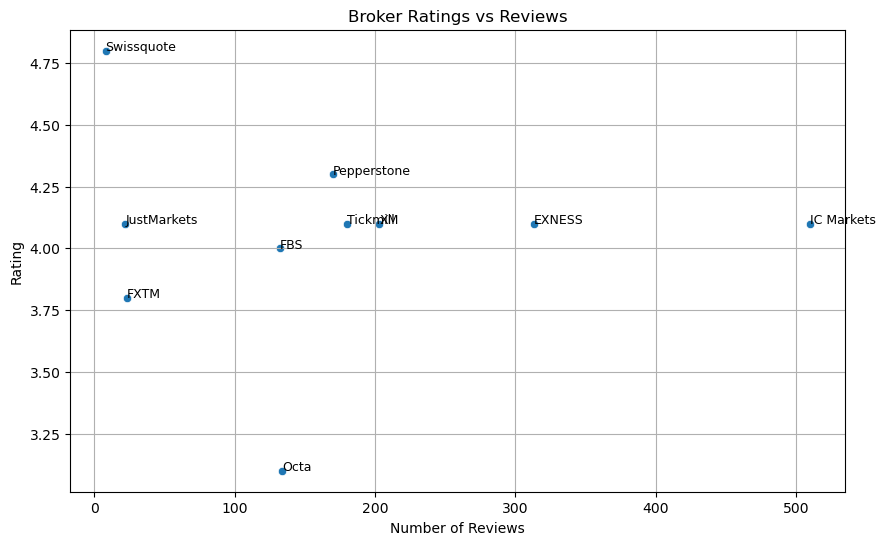

In [6]:
# Step 7: Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x='Reviews', y='Ratings')

for broker in df_viz.index:
    plt.text(x=df_viz.loc[broker, 'Reviews'], 
             y=df_viz.loc[broker, 'Ratings'], 
             s=broker, fontsize=9)

plt.title('Broker Ratings vs Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

C:\Users\IrwinOoi\AppData\Local\Temp\ipykernel_30680\1566507458.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted.index, y='Ratings', data=df_sorted, palette='Blues_d')


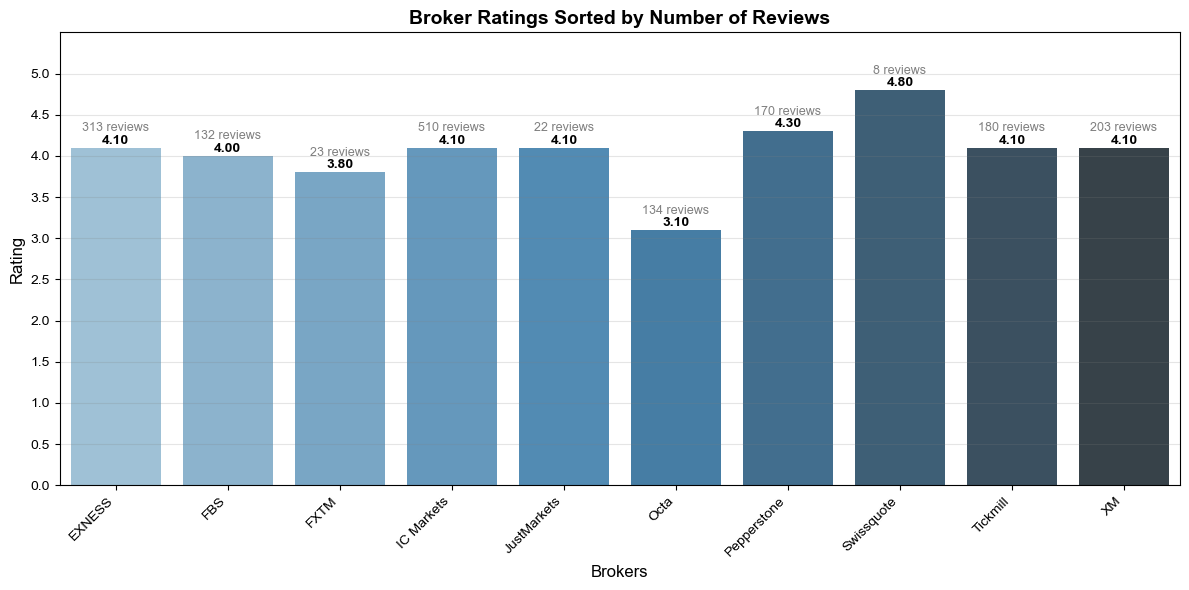

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# No sort by number of reviews
df_sorted = df_viz

# Set custom font
plt.rcParams['font.family'] = 'Arial'

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df_sorted.index, y='Ratings', data=df_sorted, palette='Blues_d')

# Annotate with ratings and number of reviews
for i, broker in enumerate(df_sorted.index):
    rating = df_sorted.loc[broker, 'Ratings']
    # Rating value above the bar
    plt.text(i, rating + 0.05, 
             f"{rating:.2f}", ha='center', fontsize=10, fontweight='bold', color='black')
    # Number of reviews above the bar (just under the ratings number)
    plt.text(i, rating + 0.20,  # Positioning the review count just above the bar
             f"{int(df_sorted.loc[broker, 'Reviews'])} reviews", ha='center', fontsize=9, color='gray')

# Title and labels
plt.title('Broker Ratings Sorted by Number of Reviews', fontsize=14, weight='bold', color='black')
plt.xlabel('Brokers', fontsize=12, color='black')
plt.ylabel('Rating', fontsize=12, color='black')

# Set x-axis ticks
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust y-axis limits and ticks
plt.ylim(0, 5.5)
plt.yticks([i * 0.5 for i in range(0, 11)])  # Explicitly set y-ticks with 0.5 intervals

# Add gridlines
plt.grid(True, axis='y', linestyle='-', alpha=0.2, color='gray')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\IrwinOoi\AppData\Local\Temp\ipykernel_30680\3603461250.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted.index, y='Ratings', data=df_sorted, palette='Blues_d')


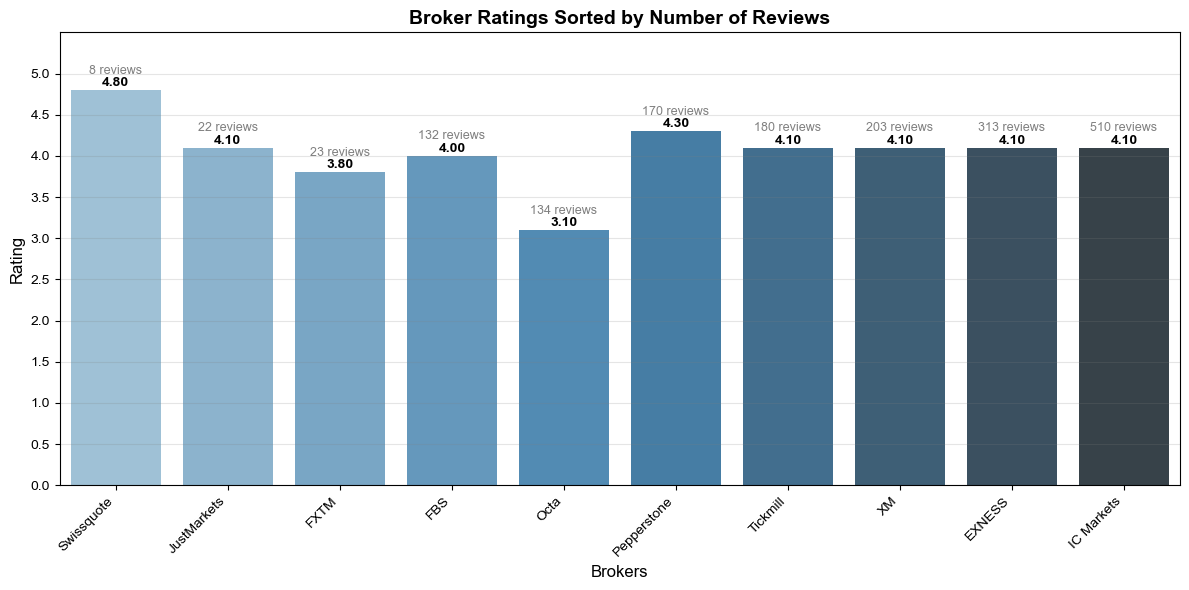

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by number of reviews (ascending)
df_sorted = df_viz.sort_values('Reviews', ascending=True)

# Set custom font
plt.rcParams['font.family'] = 'Arial'

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df_sorted.index, y='Ratings', data=df_sorted, palette='Blues_d')

# Annotate with ratings and number of reviews
for i, broker in enumerate(df_sorted.index):
    rating = df_sorted.loc[broker, 'Ratings']
    # Rating value above the bar
    plt.text(i, rating + 0.05, 
             f"{rating:.2f}", ha='center', fontsize=10, fontweight='bold', color='black')
    # Number of reviews above the bar chart and below the rating number
    plt.text(i, rating + 0.2,  # This places the reviews above the rating number
             f"{int(df_sorted.loc[broker, 'Reviews'])} reviews", ha='center', fontsize=9, color='gray')

# Title and labels
plt.title('Broker Ratings Sorted by Number of Reviews', fontsize=14, weight='bold', color='black')
plt.xlabel('Brokers', fontsize=12, color='black')
plt.ylabel('Rating', fontsize=12, color='black')

# Set x-axis ticks
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust y-axis limits and ticks
plt.ylim(0, 5.5)
plt.yticks([i * 0.5 for i in range(0, 11)])  # Explicitly set y-ticks with 0.5 intervals

# Add gridlines
plt.grid(True, axis='y', linestyle='-', alpha=0.2, color='gray')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\IrwinOoi\AppData\Local\Temp\ipykernel_30680\1577117585.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_features = df_features.applymap(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)


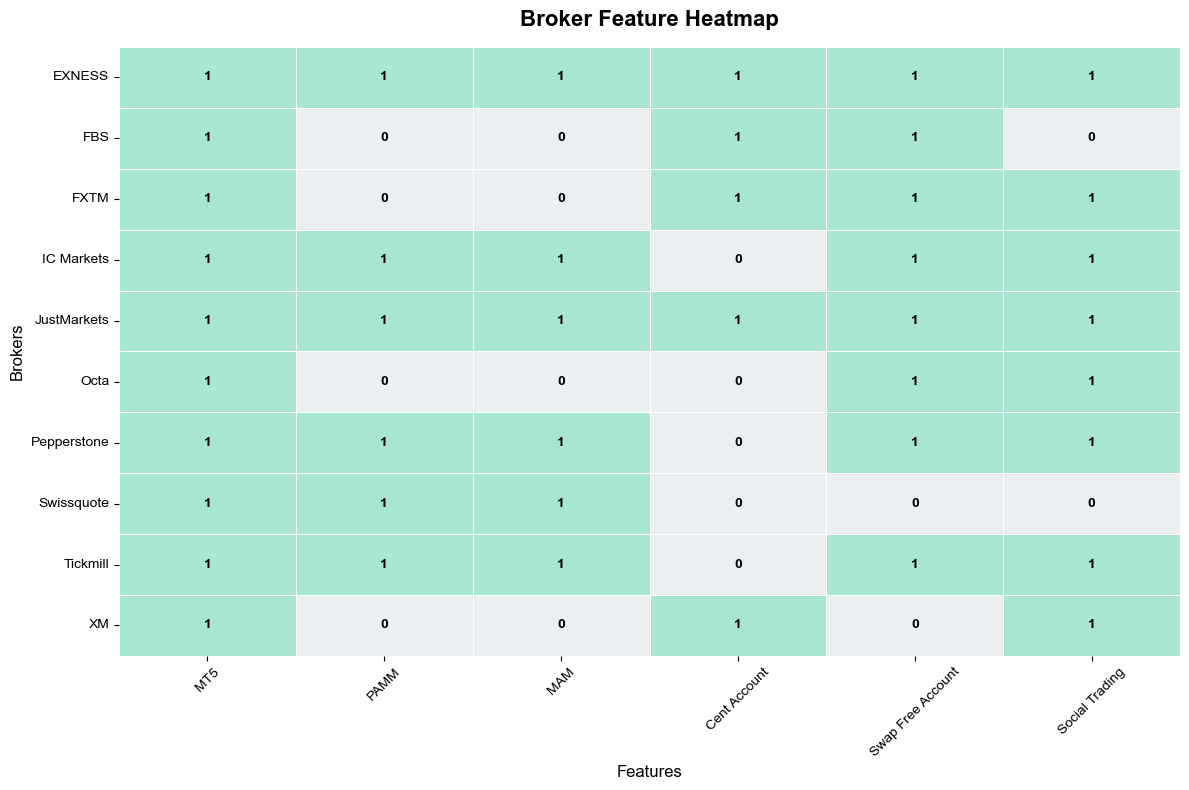

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Features to include in the heatmap
feature_cols = ['MT5', 'PAMM', 'MAM', 'Cent Account', 'Swap Free Account', 'Social Trading']

# Select relevant columns (features)
df_features = df_t[feature_cols].copy()

# Convert values to binary: 1 if YES, else 0
df_features = df_features.applymap(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

# Clean and modern binary colormap (0 = light gray, 1 = soft green)
clean_cmap = ListedColormap(['#ECEFF1', '#A8E6CF'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_features,
    cmap=clean_cmap,
    cbar=False,
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt='d',
    annot_kws={"size": 10, "weight": "bold", "color": "black"}
)

plt.title('Broker Feature Heatmap', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Brokers', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()





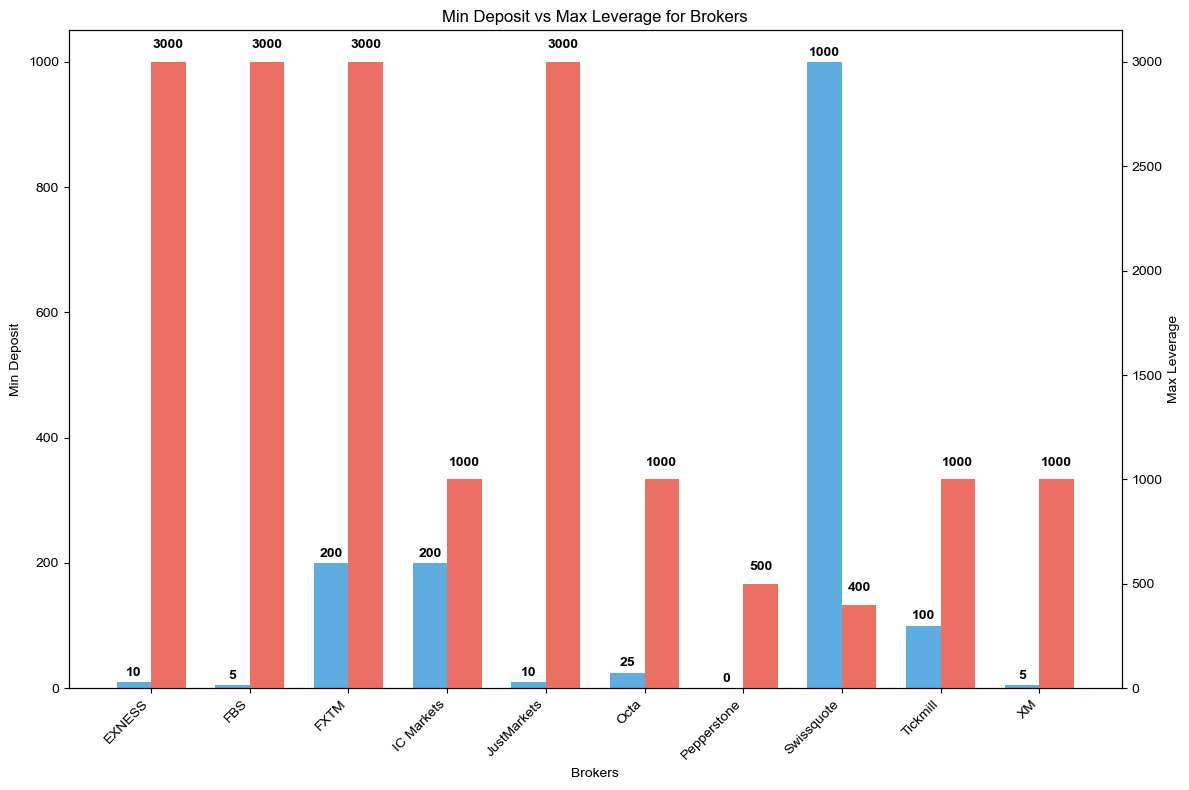

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data
brokers = df_t.index
min_deposit = df_t['Min Deposit']
max_leverage = df_t['Max Leverage']

# Plotting setup
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar width
bar_width = 0.35

# Positioning of bars
index = np.arange(len(brokers))

# Plot Min Deposit on the left y-axis with modern color
bars1 = ax1.bar(index - bar_width/2, min_deposit, bar_width, color='#3498db', alpha=0.8, label='Min Deposit')

# Add the values above the bars for Min Deposit
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 0), ha='center', va='bottom', color='black', fontweight='bold')

ax1.set_xlabel('Brokers')
ax1.set_ylabel('Min Deposit', color='black')
ax1.set_xticks(index)
ax1.set_xticklabels(brokers, rotation=45, ha="right")
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for Max Leverage
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width/2, max_leverage, bar_width, color='#e74c3c', alpha=0.8, label='Max Leverage')

# Add the values above the bars for Max Leverage
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 0), ha='center', va='bottom', color='black', fontweight='bold')

ax2.set_ylabel('Max Leverage', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and layout
plt.title('Min Deposit vs Max Leverage for Brokers')
fig.tight_layout()

plt.show()